# 📊 Tugas 6 – Clustering: Hierarchical Clustering & K-Means

Pada tugas ini, kita akan menggunakan **Health and Lifestyle Dataset** yang dapat diakses melalui link berikut:\
🔗 https://www.kaggle.com/datasets/chik0di/health-and-lifestyle-dataset/data

Tujuan utama dari tugas ini adalah melakukan **unsupervised learning (clustering)** menggunakan dua metode:

- **K-Means Clustering**
- **Hierarchical Clustering**

Kedua metode ini akan digunakan untuk mengelompokkan data berdasarkan pola **gaya hidup dan kesehatan**, serta membandingkan performa dan hasil clustering.

Langkah-langkah utama yang harus dilakukan antara lain:

1. Persiapan Dataset & Eksplorasi Awal
- Memuat dataset, melihat struktur data, tipe fitur, dan distribusi.

2. Preprocessing Data
- Menangani missing values, encoding fitur kategorikal, dan normalisasi.

3. K-Means Clustering
- Menentukan jumlah cluster optimal (Elbow Method) dan menghitung silhouette score.

4. Hierarchical Clustering
- Membuat dendrogram dan membandingkan hasil clustering dengan metode Agglomerative.

5. Visualisasi Hasil Clustering
- Menampilkan hasil cluster dalam bentuk 2D (PCA) agar mudah dipahami.

6. Analisis & Kesimpulan
- Membandingkan performa K-Means dan Hierarchical Clustering berdasarkan nilai silhouette score dan distribusi data.

# 1. Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.utils import resample

# 2. Load Dataset

In [2]:
df = pd.read_csv('health_lifestyle_dataset.csv')
df.head()

,id,age,gender,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history,disease_risk
0,1,56,Male,20.5,4198,3.9,3.4,1602,0,0,97,161,111,240,0,0
1,2,69,Female,33.3,14359,9.0,4.7,2346,0,1,68,116,65,207,0,0
2,3,46,Male,31.6,1817,6.6,4.2,1643,0,1,90,123,99,296,0,0
3,4,32,Female,38.2,15772,3.6,2.0,2460,0,0,71,165,95,175,0,0
4,5,60,Female,33.6,6037,3.8,4.0,3756,0,1,98,139,61,294,0,0


# 3. Eksplorasi Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 100000 non-null  int64  
 1   age                100000 non-null  int64  
 2   gender             100000 non-null  object 
 3   bmi                100000 non-null  float64
 4   daily_steps        100000 non-null  int64  
 5   sleep_hours        100000 non-null  float64
 6   water_intake_l     100000 non-null  float64
 7   calories_consumed  100000 non-null  int64  
 8   smoker             100000 non-null  int64  
 9   alcohol            100000 non-null  int64  
 10  resting_hr         100000 non-null  int64  
 11  systolic_bp        100000 non-null  int64  
 12  diastolic_bp       100000 non-null  int64  
 13  cholesterol        100000 non-null  int64  
 14  family_history     100000 non-null  int64  
 15  disease_risk       100000 non-null  int64  
dtypes: 

In [4]:
df.describe(include='all')

,id,age,gender,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history,disease_risk
count,100000.000000,100000.000000,100000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,50132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,50000.500000,48.525990,NaN,29.024790,10479.87029,6.491784,2.751496,2603.341200,0.200940,0.300020,74.457420,134.58063,89.508850,224.300630,0.299150,0.248210
std,28867.657797,17.886768,NaN,6.352666,5483.63236,2.021922,1.297338,807.288563,0.400705,0.458269,14.423715,25.95153,17.347041,43.327749,0.457888,0.431976
min,1.000000,18.000000,NaN,18.000000,1000.00000,3.000000,0.500000,1200.000000,0.000000,0.000000,50.000000,90.00000,60.000000,150.000000,0.000000,0.000000
25%,25000.750000,33.000000,NaN,23.500000,5729.00000,4.700000,1.600000,1906.000000,0.000000,0.000000,62.000000,112.00000,74.000000,187.000000,0.000000,0.000000
50%,50000.500000,48.000000,NaN,29.000000,10468.00000,6.500000,2.800000,2603.000000,0.000000,0.000000,74.000000,135.00000,89.000000,224.000000,0.000000,0.000000
75%,75000.250000,64.000000,NaN,34.500000,15229.00000,8.200000,3.900000,3299.000000,0.000000,1.000000,87.000000,157.00000,105.000000,262.000000,1.000000,0.000000


In [5]:
df.isnull().sum()

id                   0
age                  0
gender               0
bmi                  0
daily_steps          0
sleep_hours          0
water_intake_l       0
calories_consumed    0
smoker               0
alcohol              0
resting_hr           0
systolic_bp          0
diastolic_bp         0
cholesterol          0
family_history       0
disease_risk         0
dtype: int64

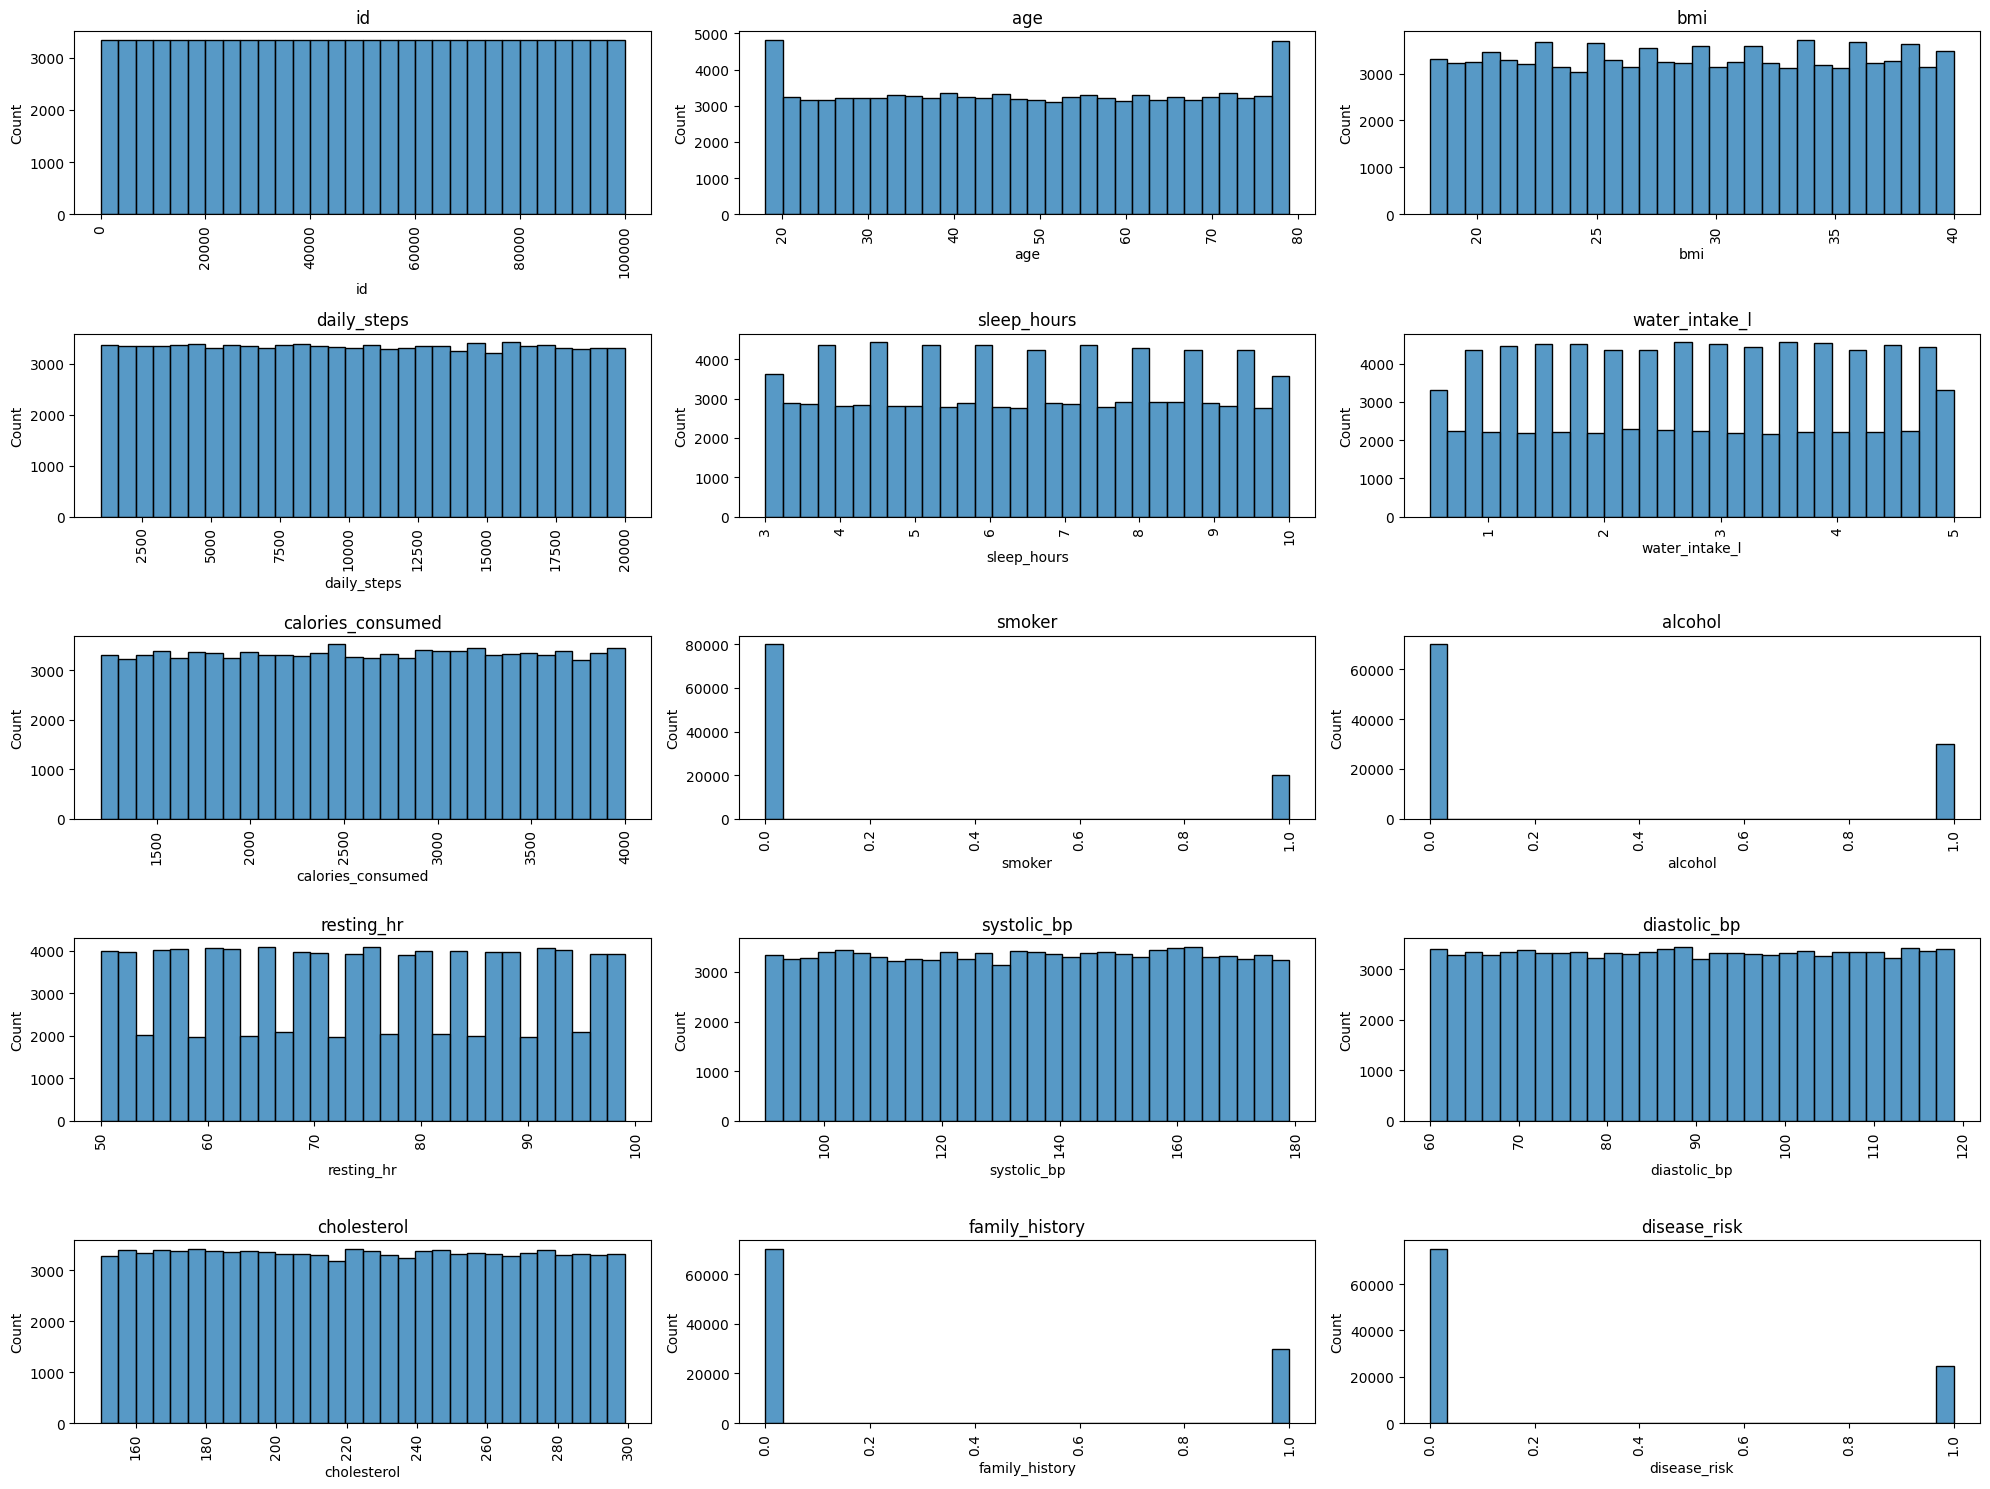

In [6]:
kolom_numerik = df.select_dtypes(np.number).columns
fig, axes = plt.subplots(5, 3, figsize=(20,15))
axes = axes.flatten()

for i, col in enumerate(kolom_numerik):
    sns.histplot(df[col], ax=axes[i], bins=30)
    axes[i].tick_params(axis='x', rotation=90)  # miring per subplot
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

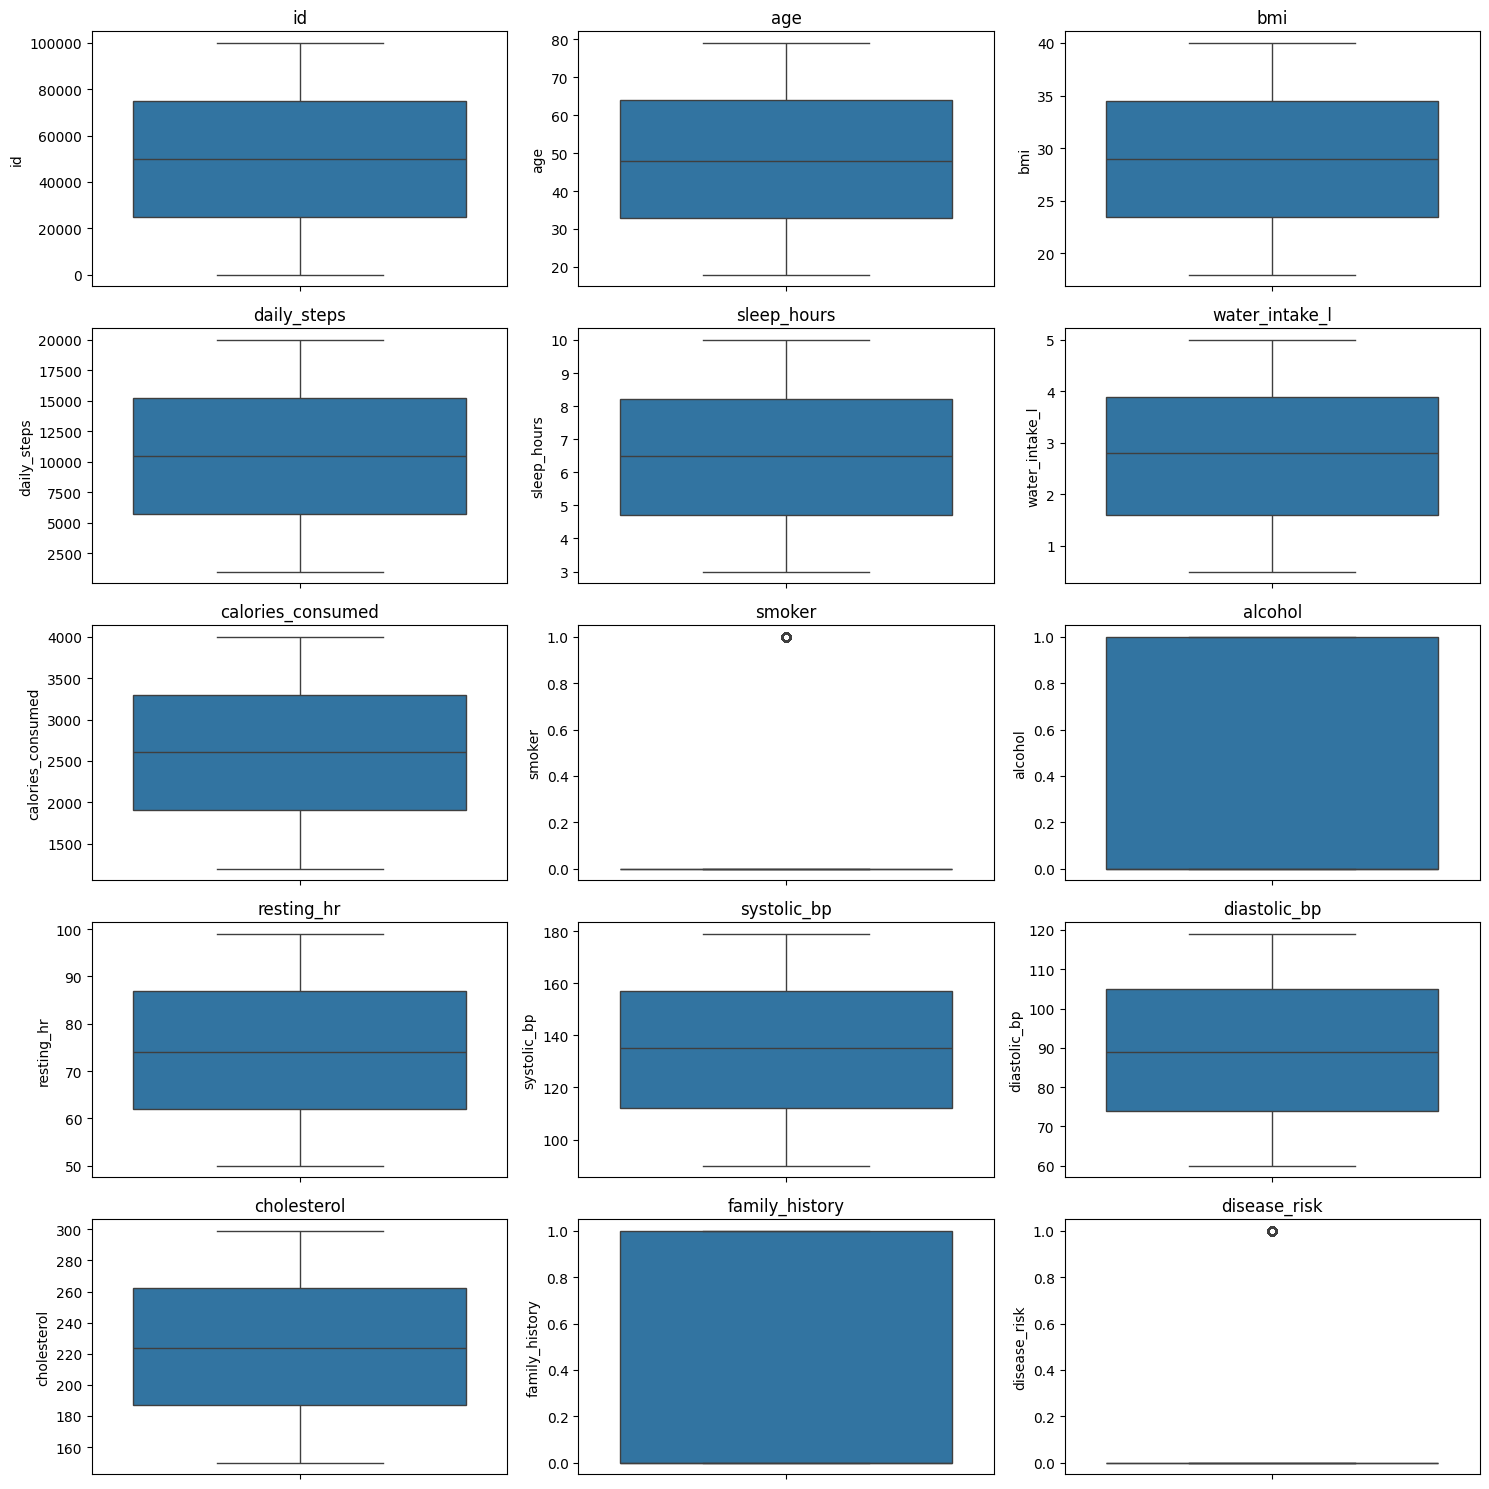

In [7]:
fig, axes = plt.subplots(5, 3, figsize=(15,15))
axes = axes.flatten()

for i, col in enumerate(df.select_dtypes(np.number)):
    sns.boxplot(df[col], ax=axes[i])
    axes[i].tick_params(axis='x')  # miring per subplot
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

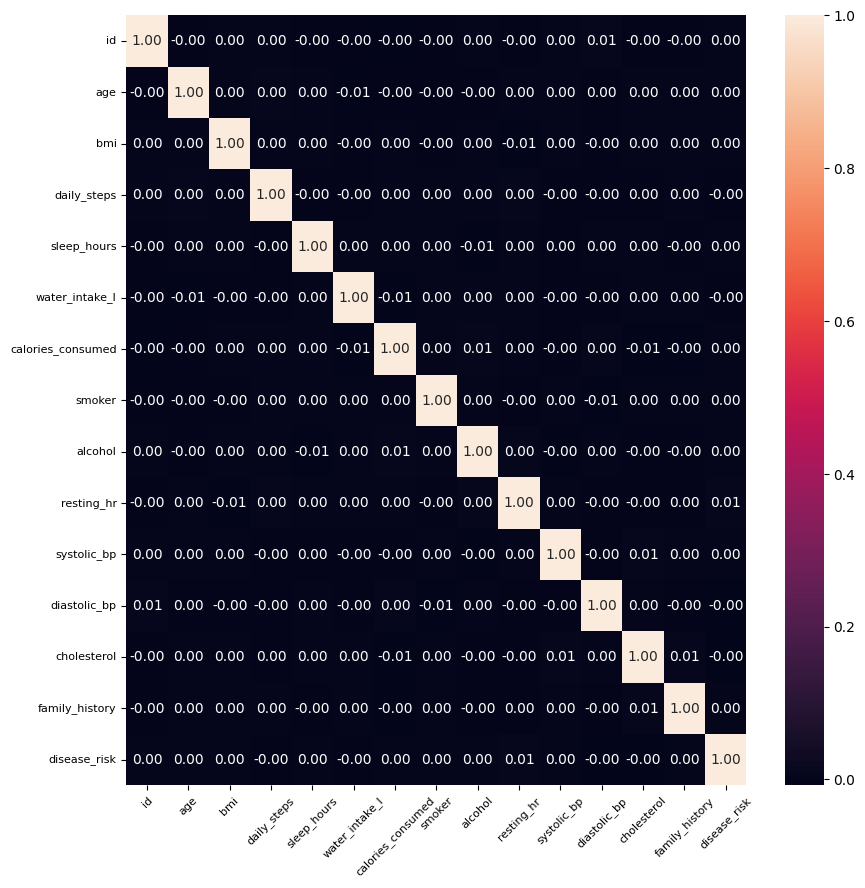

In [8]:
plt.figure(figsize=(10,10))
korelasi = df.select_dtypes(np.number).corr(method='pearson')
sns.heatmap(korelasi, annot=True, fmt='.2f')
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.show()

# 4. Data Cleaning & Preprocessing

In [9]:
df = pd.get_dummies(df)

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# 5. K-Means Clustering

In [11]:
X_sample = resample(X_scaled, n_samples=1000, random_state=42)

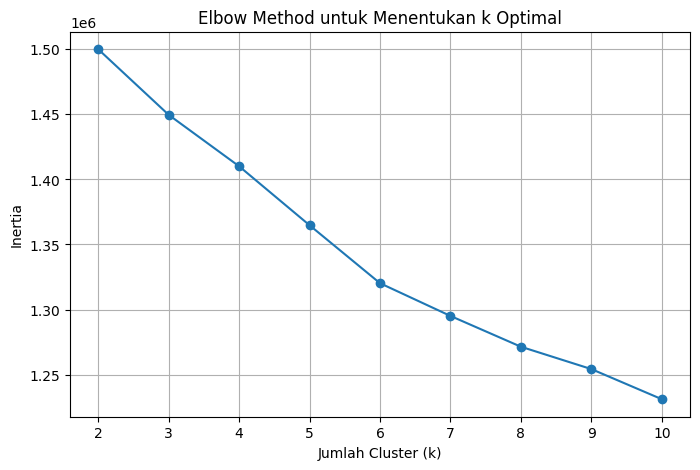

In [12]:
inertia = []
K = range(2, 11)  # range k yang umum digunakan

for k in K:
    kmeans = KMeans(
        n_clusters=k,
        init='k-means++',
        n_init=10,
        max_iter=300,
        random_state=42
    )
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# --- 3. Plot Elbow Method ---
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o', linestyle='-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Menentukan k Optimal')
plt.xticks(K)
plt.grid(True)
plt.show()

In [13]:
kmeans = KMeans(n_clusters=2, random_state=42)
label_kmeans = kmeans.fit_predict(X_sample)

# Evaluasi
silhouette_kmeans = silhouette_score(X_sample, label_kmeans)
print('Silhouette Score (K-Means):', silhouette_kmeans)

Silhouette Score (K-Means): 0.11802193866881135


# 6. Hierarchical Clustering

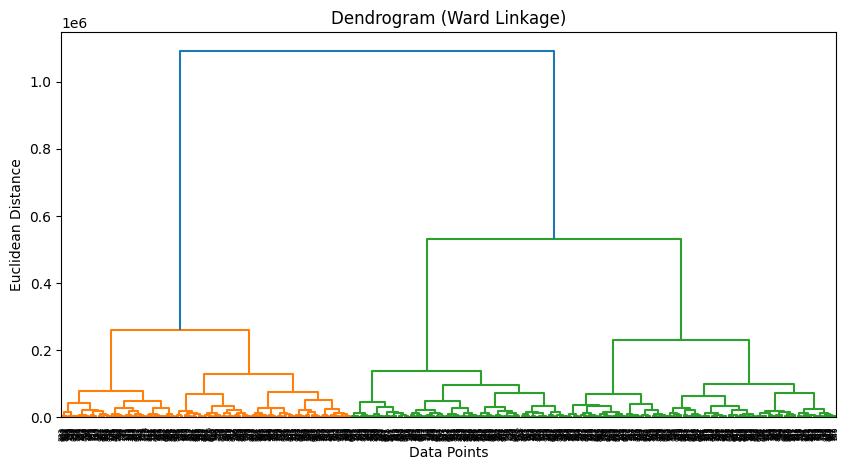

In [14]:
sample = df.sample(n=1000, random_state=42)
linked = linkage(sample, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title('Dendrogram (Ward Linkage)')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

In [15]:
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
label_hierarchical = hc.fit_predict(X_sample)

# Evaluasi
silhouette_hc = silhouette_score(X_sample, label_hierarchical)
print('Silhouette Score (Hierarchical):', silhouette_hc)

Silhouette Score (Hierarchical): 0.10233135383852592


# 7. Visualisasi Hasil Clustering

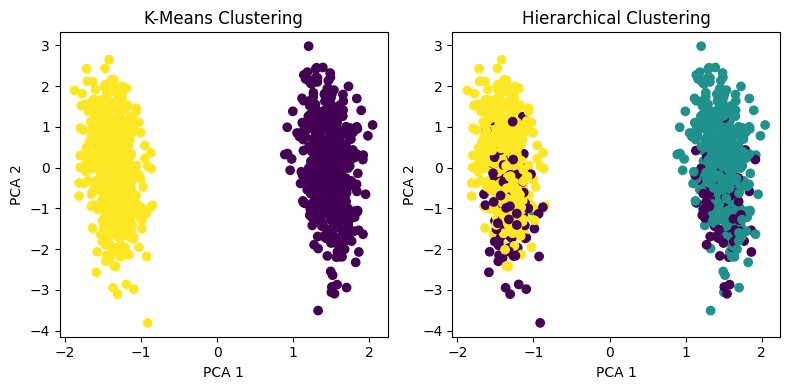

In [16]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sample)

plt.figure(figsize=(8,4))

# Visualisasi K-Means
plt.subplot(1,2,1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=label_kmeans, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

# Visualisasi Hierarchical Clustering
plt.subplot(1,2,2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=label_hierarchical, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.tight_layout()
plt.show()

# 8. Analisis Cluster

In [17]:
df_sample = df.sample(n=1000, random_state=42).copy()
df_sample['Cluster_KMeans'] = label_kmeans
df_sample['Cluster_HC'] = label_hierarchical

print('=== Cluster Analysis (K-Means) ===')
display(df_sample.groupby('Cluster_KMeans').mean())

print('\n=== Cluster Analysis (Hierarchical) ===')
display(df_sample.groupby('Cluster_HC').mean())

=== Cluster Analysis (K-Means) ===


,id,age,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history,disease_risk,gender_Female,gender_Male,Cluster_HC
Cluster_KMeans,,,,,,,,,,,,,,,,,,
0,49068.925466,49.782609,29.180331,10205.979296,6.550932,2.817805,2557.689441,0.180124,0.277433,75.136646,134.658385,89.438923,223.300207,0.291925,0.240166,0.501035,0.498965,0.830228
1,46817.978723,48.533849,28.840619,10826.085106,6.507157,2.772340,2596.382979,0.197292,0.241779,75.042553,133.893617,88.922631,225.779497,0.288201,0.270793,0.458414,0.541586,1.601547



=== Cluster Analysis (Hierarchical) ===


,id,age,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history,disease_risk,gender_Female,gender_Male,Cluster_KMeans
Cluster_HC,,,,,,,,,,,,,,,,,,
0,45544.200000,48.475676,29.038919,10594.908108,6.563243,2.832973,2616.740541,0.172973,0.232432,75.443243,134.805405,88.837838,221.237838,0.270270,0.194595,0.529730,0.470270,0.551351
1,48976.418953,49.987531,29.131421,10268.438903,6.525686,2.817955,2547.556110,0.182045,0.276808,74.830424,134.925187,89.516209,224.089776,0.289277,0.251870,0.478803,0.521197,0.004988
2,47922.620773,48.608696,28.866667,10746.067633,6.515217,2.754106,2589.437198,0.202899,0.253623,75.178744,133.379227,88.987923,226.553140,0.299517,0.287440,0.456522,0.543478,0.997585


# 9. Kesimpulan

- **K-Means** lebih cepat dan cocok untuk dataset besar, menghasilkan cluster dengan bentuk bulat.
- **Hierarchical Clustering** memberikan visualisasi yang lebih informatif melalui dendrogram namun lebih lambat pada dataset besar.
- Nilai **Silhouette Score** digunakan untuk menentukan kualitas cluster. Semakin tinggi nilainya, semakin baik hasil clustering.
- Berdasarkan analisis rata-rata fitur, dapat diidentifikasi kelompok individu dengan karakteristik kesehatan dan gaya hidup yang serupa.